In [1]:
import pandas as pd
from prophet import Prophet

/home/shawn/Work/iitb/events/data_davinci/repo/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MONTHS = ["JAN", "FEB", "MAR", "APR", "MAY", "JUNE", "JULY", "AUG", "SEP", "OCT", "NOV", "DEC"]
def get_data(path: str):
    data = pd.read_csv(path)
    data["MONTH"] = data["MONTH"].str.strip()
    for i, month in enumerate(MONTHS):
        no = str(i + 1)
        if len(no) == 1:
            no = "0" + no
        data["MONTH"] = data["MONTH"].str.replace(month, no)
    
    data["DATE"] = pd.to_datetime((data["YEAR"].astype(str) + " " + data["MONTH"]), format="%Y %m")
    data.dropna(subset=["PASSENGERS CARRIED"], inplace=True)
    data["PASSENGERS CARRIED"] = data["PASSENGERS CARRIED"].str.replace(',', '').astype(int)
    data.drop(columns=["AIRLINE", "YEAR", "MONTH"], inplace=True)
    data.sort_values("DATE", inplace=True)
    
    out = data[["DATE", "PASSENGERS CARRIED"]].rename(columns={"DATE": "ds", "PASSENGERS CARRIED": "y"})
    return out

In [3]:
df = get_data("./air-trafic-prediction/AirtrafficA4.csv")

In [4]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

00:59:18 - cmdstanpy - INFO - Chain [1] start processing
00:59:18 - cmdstanpy - INFO - Chain [1] done processing


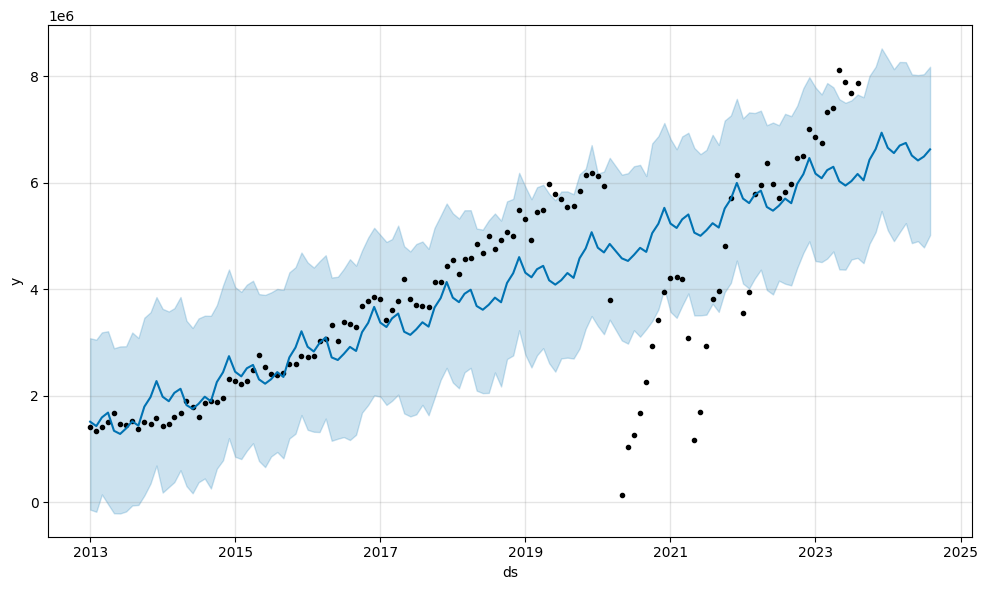

In [5]:
fig = model.plot(forecast)